## 설명
- 감정 -> 긍정1,중립0,부정-1로 전환
- X(t) = 가격
- Y(t) = 심리
- N(t) = 글 수
- S_index1 = 감정s * 글 수 num

In [123]:
pip install pyecharts

In [124]:
pip install chart_studio

In [126]:
import warnings
warnings.filterwarnings('ignore')

In [127]:
import pyecharts

In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
import operator
import seaborn as sns
from datetime import datetime
from matplotlib import font_manager, rc

from pyecharts.charts import Bar
from pyecharts.charts import Line

In [129]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [130]:
!ls -l '/content/drive/MyDrive/Colab Notebooks/datasets/stock_market/ab-practice.csv'
!ls -l '/content/drive/MyDrive/Colab Notebooks/datasets/stock_market/Bitcoin_Cash.csv'
!ls -l '/content/drive/MyDrive/Colab Notebooks/datasets/stock_market/XRP.csv'

-rw------- 1 root root 75337 Nov 15 08:31 '/content/drive/MyDrive/Colab Notebooks/datasets/stock_market/ab-practice.csv'
-rw------- 1 root root 17367 Nov 15 09:47 '/content/drive/MyDrive/Colab Notebooks/datasets/stock_market/Bitcoin_Cash.csv'
-rw------- 1 root root 50009 Nov 17 07:15 '/content/drive/MyDrive/Colab Notebooks/datasets/stock_market/XRP.csv'


In [131]:
DF = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets/stock_market/ab-practice.csv')
DF_price = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets/stock_market/XRP.csv')

In [132]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2662 entries, 0 to 2661
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       2662 non-null   object 
 1   coin_name  2662 non-null   object 
 2   num        2662 non-null   int64  
 3   s          2662 non-null   float64
 4   lang       2662 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 104.1+ KB


In [133]:
DF.groupby('coin_name')['coin_name'].count()

coin_name
ada     253
bch     227
btc     298
doge    164
eos      41
eth     346
omg     526
snt     742
xrp      65
Name: coin_name, dtype: int64

In [134]:
DF_XRP = DF[DF['coin_name'] == 'xrp']

In [135]:
DF_XRP

,date,coin_name,num,s,lang
2,2016-05-31,xrp,69,1.014493,kor
2166,2021-09-10,xrp,3,1.000000,kor
2174,2021-09-11,xrp,21,1.047619,kor
2181,2021-09-12,xrp,8,0.625000,kor
2188,2021-09-13,xrp,22,1.227273,kor
...,...,...,...,...,...
2630,2021-11-08,xrp,24,0.625000,kor
2638,2021-11-09,xrp,22,0.681818,kor
2645,2021-11-10,xrp,28,1.000000,kor
2653,2021-11-11,xrp,32,0.843750,kor


In [136]:
DF_XRP = DF_XRP.reset_index(drop=True)

In [137]:
DF_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682 entries, 0 to 681
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      682 non-null    object 
 1   Price     682 non-null    float64
 2   Open      682 non-null    float64
 3   High      682 non-null    float64
 4   Low       682 non-null    float64
 5   Vol.      682 non-null    object 
 6   Change %  682 non-null    object 
dtypes: float64(4), object(3)
memory usage: 37.4+ KB


In [138]:
DF_price.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,"Nov 12, 2021",1.18836,1.21489,1.23284,1.15537,617.77M,-2.19%
1,"Nov 11, 2021",1.21499,1.19227,1.25419,1.17713,647.85M,1.91%
2,"Nov 10, 2021",1.19223,1.25619,1.34634,1.13594,1.26B,-5.08%
3,"Nov 09, 2021",1.25608,1.28185,1.28767,1.23000,622.97M,-2.01%
4,"Nov 08, 2021",1.28185,1.21795,1.29468,1.21795,788.09M,5.25%


In [139]:
DF_price['Price'][178]

1.59055

In [140]:
#리플가격은 이미 낮아서 작업 필요 없음
# DF_price['Price'][178] = DF_price['Price'][178].replace(',','')

AttributeError: ignored

In [141]:
# DF_price['Price'][178]

1.59055

In [18]:
# for i in range(len(DF_price['Price'])):
#   DF_price['Price'][i] = DF_price['Price'][i].replace(',','')



In [19]:
# DF_price['Price'][178]

'1090.47'

In [20]:
# DF_price['Price'][178] = pd.to_numeric(DF_price['Price'][178], downcast = 'float')

In [142]:
type(DF_price['Price'][179])

numpy.float64

In [143]:
for i in range(len(DF_price['Price'])):
  DF_price['Price'][i] = pd.to_numeric(DF_price['Price'][i], downcast = 'float')

In [144]:
DF_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682 entries, 0 to 681
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      682 non-null    object 
 1   Price     682 non-null    float64
 2   Open      682 non-null    float64
 3   High      682 non-null    float64
 4   Low       682 non-null    float64
 5   Vol.      682 non-null    object 
 6   Change %  682 non-null    object 
dtypes: float64(4), object(3)
memory usage: 37.4+ KB


In [145]:
date_time_obj = datetime.strptime(DF_price['Date'][0], '%b %d, %Y')
date_time_obj

datetime.datetime(2021, 11, 12, 0, 0)

In [146]:
date_time_obj.strftime("%Y-%m-%d")

'2021-11-12'

In [147]:
DF_price.iloc[0]

Date        Nov 12, 2021
Price            1.18836
Open             1.21489
High             1.23284
Low              1.15537
Vol.             617.77M
Change %          -2.19%
Name: 0, dtype: object

In [148]:
A = []
for i in range(len(DF_price)):
  date_time_obj = datetime.strptime(DF_price['Date'][i], '%b %d, %Y')
  a = date_time_obj.strftime("%Y-%m-%d")
  A.append(a)

In [149]:
B = []
for i in range(len(DF_price)):
  x = DF_price['Price'][i]
  date_time_obj = datetime.strptime(DF_price['Date'][i], '%b %d, %Y')
  a = date_time_obj.strftime("%Y-%m-%d")
  Y = [a,x]
  B.append(Y)
DF_B = pd.DataFrame(B)
DF_B.columns = ['date','price']

In [ ]:
# for i in DF_B['date']:
#   for j in DF_bch['date']:
#     if i == j:
#       print('매치', i, j)


In [200]:
C = []
for i in range(len(DF_B)):
  for j in range(len(DF_XRP)):
    if DF_B['date'][i] == DF_XRP['date'][j]:
      # print('매치', i, j , DF_B['date'][i], DF_XRP['date'][j], DF_B['price'][i], DF_XRP['s'][j])
      a = DF_B['date'][i]
      b = DF_B['price'][i]
      c = DF_XRP['s'][j]
      d = DF_XRP['num'][j]
      Y = [a,b,c,d]
      C.append(Y)
      
DF_XRP_F = pd.DataFrame(C)
DF_XRP_F.columns = ['date','price','s','num']

In [166]:
DF_XRP_F

,date,price,s,num
0,2021-11-12,1.18836,1.062500,16
1,2021-11-11,1.21499,0.843750,32
2,2021-11-10,1.19223,1.000000,28
3,2021-11-09,1.25608,0.681818,22
4,2021-11-08,1.28185,0.625000,24
...,...,...,...,...
59,2021-09-14,1.09533,0.769231,13
60,2021-09-13,1.06421,1.227273,22
61,2021-09-12,1.11918,0.625000,8
62,2021-09-11,1.07882,1.047619,21


In [201]:
DF_XRP_F['s'] = -1*(DF_XRP_F['s']-1)

In [202]:
DF_XRP_F

,date,price,s,num
0,2021-11-12,1.18836,-0.062500,16
1,2021-11-11,1.21499,0.156250,32
2,2021-11-10,1.19223,-0.000000,28
3,2021-11-09,1.25608,0.318182,22
4,2021-11-08,1.28185,0.375000,24
...,...,...,...,...
59,2021-09-14,1.09533,0.230769,13
60,2021-09-13,1.06421,-0.227273,22
61,2021-09-12,1.11918,0.375000,8
62,2021-09-11,1.07882,-0.047619,21


In [203]:
DF_XRP_F1 =DF_XRP_F.set_index("date")

## 3) 시각화

### 1) 감정s만 일단

In [33]:
# DF_bch_F.sort_values(by = 'date', axis = 0,ascending=True)
# # DF_bch_F = DF_bch_F.reset_index(drop=True)

In [34]:
# DF_bch_F = DF_bch_F.reset_index( inplace=True)

In [171]:
Y_values = DF_XRP_F['s']

In [172]:
X_values = DF_XRP_F['price']

In [173]:
t_values = DF_XRP_F['date']	

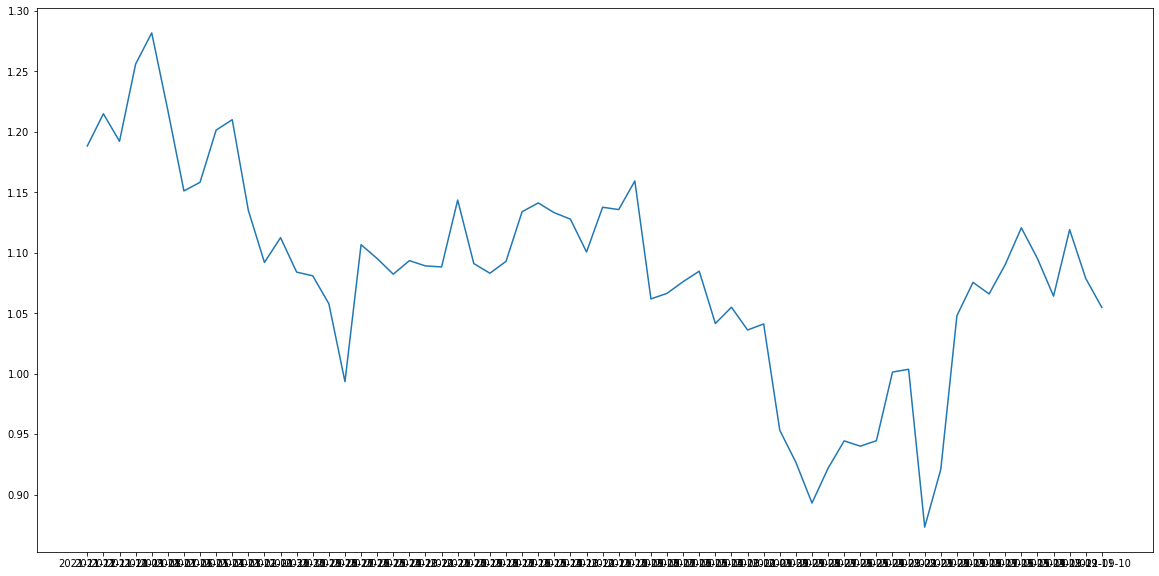

In [174]:
ax = plt.plot(t_values,X_values)
plt.show()

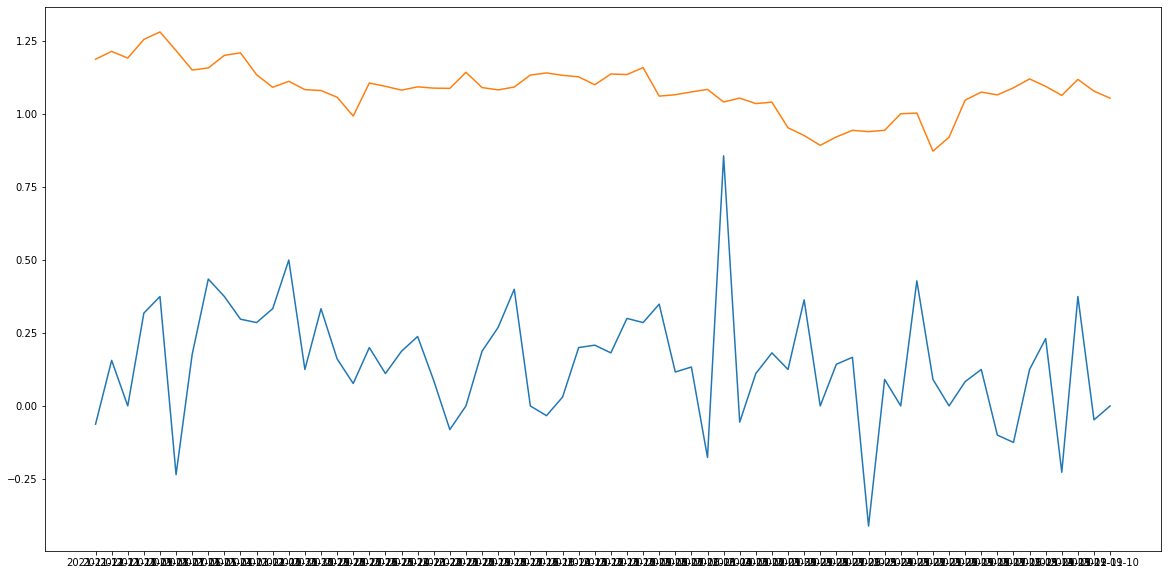

In [177]:
plt.figure(figsize=(20,10))

plt.plot(t_values, Y_values)	
plt.plot(t_values, X_values)

plt.show()

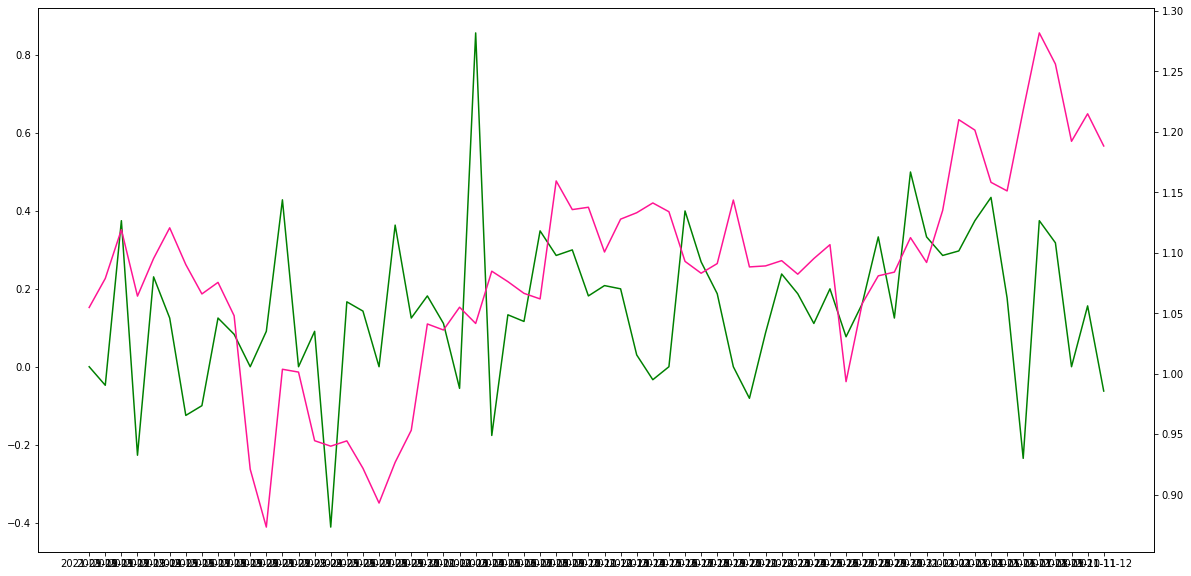

In [178]:
plt.rcParams['figure.figsize'] = (20, 10)
fig, ax1 = plt.subplots()
ax1.plot(t_values, Y_values , color = 'green')

ax2 = ax1.twinx()
ax2.invert_xaxis()
ax2.plot(t_values, X_values , color = 'deeppink')

plt.show()

In [179]:
import plotly.offline as plyo
import cufflinks

In [186]:
# 아래그래프 그리기기 전 스케일 전환
DF_XRP_F1_iplot = DF_XRP_F1[['price','s']]

In [187]:
plyo.iplot(DF_XRP_F1_iplot.iplot(asFigure=True))

In [193]:
DF_XRP_x = DF_XRP_F1_iplot

In [194]:
#글 수 20개 이상만 그래프 반영하기
for i in range(len(DF_XRP_F1)):
  if DF_XRP_F1['num'][i] <= 19 :
    DF_XRP_x['s'][i] = 0
    # print('yes')
  # else :
  #   # print('no')


In [195]:
plyo.iplot(DF_XRP_x.iplot(asFigure=True))

In [49]:
# x_values = DF_bch_Fx2['date']	
# y_values = DF_bch_Fx2['s']
# z_values = DF_bch_Fx2['price']

# plt.rcParams['figure.figsize'] = (20, 10)
# fig, ax1 = plt.subplots()
# ax1.plot(x_values, y_values , color = 'green')

# ax2 = ax1.twinx()
# ax2.invert_xaxis()
# ax2.plot(x_values, z_values , color = 'deeppink')

# plt.show()

## 4) 데이터 프레임 작업


- s의 변화율과, 변화율의 변화율이 필요
- Y(t) = 감정평균
- N(t) = 글 수
- S_index1 = Y(t)*N(t)

In [206]:
DF_XRP_F

,date,price,s,num
0,2021-11-12,1.18836,-0.062500,16
1,2021-11-11,1.21499,0.156250,32
2,2021-11-10,1.19223,-0.000000,28
3,2021-11-09,1.25608,0.318182,22
4,2021-11-08,1.28185,0.375000,24
...,...,...,...,...
59,2021-09-14,1.09533,0.230769,13
60,2021-09-13,1.06421,-0.227273,22
61,2021-09-12,1.11918,0.375000,8
62,2021-09-11,1.07882,-0.047619,21


In [207]:
DF_XRP_F['S_index1'] = DF_XRP_F['s']*DF_XRP_F['num']

In [208]:
DF_XRP_F

,date,price,s,num,S_index1
0,2021-11-12,1.18836,-0.062500,16,-1.0
1,2021-11-11,1.21499,0.156250,32,5.0
2,2021-11-10,1.19223,-0.000000,28,-0.0
3,2021-11-09,1.25608,0.318182,22,7.0
4,2021-11-08,1.28185,0.375000,24,9.0
...,...,...,...,...,...
59,2021-09-14,1.09533,0.230769,13,3.0
60,2021-09-13,1.06421,-0.227273,22,-5.0
61,2021-09-12,1.11918,0.375000,8,3.0
62,2021-09-11,1.07882,-0.047619,21,-1.0


In [209]:
# 1차 도함수 Y는 sns변수 t 시간에 따라  dt= 하루
DF_XRP_F['D(1)Y(t)'] = -1*(DF_XRP_F['s'].diff().shift(-1))/1

In [210]:
# 2차 도함수 Y는 sns변수 t 시간에 따라  dt= 하루
DF_XRP_F['D(2)Y(t)'] = -1*(DF_XRP_F['D(1)Y(t)'].diff().shift(-1))/1

In [213]:
DF_XRP_F

,date,price,s,num,S_index1,D(1)Y(t),D(2)Y(t)
0,2021-11-12,1.18836,-0.062500,16,-1.0,-0.218750,-0.375000
1,2021-11-11,1.21499,0.156250,32,5.0,0.156250,0.474432
2,2021-11-10,1.19223,-0.000000,28,-0.0,-0.318182,-0.261364
3,2021-11-09,1.25608,0.318182,22,7.0,-0.056818,-0.667112
4,2021-11-08,1.28185,0.375000,24,9.0,0.610294,1.022059
...,...,...,...,...,...,...,...
59,2021-09-14,1.09533,0.230769,13,3.0,0.458042,1.060315
60,2021-09-13,1.06421,-0.227273,22,-5.0,-0.602273,-1.024892
61,2021-09-12,1.11918,0.375000,8,3.0,0.422619,0.470238
62,2021-09-11,1.07882,-0.047619,21,-1.0,-0.047619,NaN


## 6) 수식
- Y(t) = 감정평균
- N(t) = 글 수
- S_index1 = Y(t)*N(t)
- S_index2 = (aY(t)+bD(1)Y(t)+cD(2)Y(t)) * N(t)
- a,b,c를 데이터로 구해야 하는데 일단 1/3씩


In [214]:
a=1/3
b=1/3
c=1/3
DF_XRP_F['S_index2'] = (a*DF_XRP_F['s']+b*DF_XRP_F['D(1)Y(t)']+c*DF_XRP_F['D(2)Y(t)'])*DF_XRP_F['num']

In [216]:
DF_XRP_F

,date,price,s,num,S_index1,D(1)Y(t),D(2)Y(t),S_index2
0,2021-11-12,1.18836,-0.062500,16,-1.0,-0.218750,-0.375000,-3.500000
1,2021-11-11,1.21499,0.156250,32,5.0,0.156250,0.474432,8.393939
2,2021-11-10,1.19223,-0.000000,28,-0.0,-0.318182,-0.261364,-5.409091
3,2021-11-09,1.25608,0.318182,22,7.0,-0.056818,-0.667112,-2.975490
4,2021-11-08,1.28185,0.375000,24,9.0,0.610294,1.022059,16.058824
...,...,...,...,...,...,...,...,...
59,2021-09-14,1.09533,0.230769,13,3.0,0.458042,1.060315,7.579545
60,2021-09-13,1.06421,-0.227273,22,-5.0,-0.602273,-1.024892,-13.599206
61,2021-09-12,1.11918,0.375000,8,3.0,0.422619,0.470238,3.380952
62,2021-09-11,1.07882,-0.047619,21,-1.0,-0.047619,NaN,NaN


### 2) correlation ceefficient

In [218]:
corr = DF_XRP_F.corr(method='pearson')
print(corr)

             price         s       num  S_index1  D(1)Y(t)  D(2)Y(t)  S_index2
price     1.000000  0.165027  0.232214  0.281421 -0.013635  0.011122  0.161419
s         0.165027  1.000000  0.026899  0.846515  0.738073  0.478379  0.643136
num       0.232214  0.026899  1.000000  0.382581 -0.140567 -0.134119  0.003748
S_index1  0.281421  0.846515  0.382581  1.000000  0.516401  0.307114  0.618335
D(1)Y(t) -0.013635  0.738073 -0.140567  0.516401  1.000000  0.885351  0.872146
D(2)Y(t)  0.011122  0.478379 -0.134119  0.307114  0.885351  1.000000  0.879318
S_index2  0.161419  0.643136  0.003748  0.618335  0.872146  0.879318  1.000000


## 6) 수식 -확장
- Y(t) = 감정평균
- N(t) = 계시글수
- S_index3 = (aY(t)+bD(1)Y(t)+cD(2)Y(t)) * (dN(t)+eD(1)N(t)+fD(2)N(t))

- a,b,c,d,e,f를 데이터로 구해야 하는데 일단 1/3씩

In [219]:
# 1차 도함수
DF_XRP_F['D(1)N(t)'] = -1*(DF_XRP_F['num'].diff().shift(-1))/1


In [220]:
# 2차 도함수
DF_XRP_F['D(2)N(t)'] = -1*(DF_XRP_F['D(1)N(t)'].diff().shift(-1))/1

In [221]:
DF_XRP_F

,date,price,s,num,S_index1,D(1)Y(t),D(2)Y(t),S_index2,D(1)N(t),D(2)N(t)
0,2021-11-12,1.18836,-0.062500,16,-1.0,-0.218750,-0.375000,-3.500000,-16.0,-20.0
1,2021-11-11,1.21499,0.156250,32,5.0,0.156250,0.474432,8.393939,4.0,-2.0
2,2021-11-10,1.19223,-0.000000,28,-0.0,-0.318182,-0.261364,-5.409091,6.0,8.0
3,2021-11-09,1.25608,0.318182,22,7.0,-0.056818,-0.667112,-2.975490,-2.0,-9.0
4,2021-11-08,1.28185,0.375000,24,9.0,0.610294,1.022059,16.058824,7.0,7.0
...,...,...,...,...,...,...,...,...,...,...
59,2021-09-14,1.09533,0.230769,13,3.0,0.458042,1.060315,7.579545,-9.0,-23.0
60,2021-09-13,1.06421,-0.227273,22,-5.0,-0.602273,-1.024892,-13.599206,14.0,27.0
61,2021-09-12,1.11918,0.375000,8,3.0,0.422619,0.470238,3.380952,-13.0,-31.0
62,2021-09-11,1.07882,-0.047619,21,-1.0,-0.047619,NaN,NaN,18.0,NaN


In [222]:
a=1/3
b=1/3
c=1/3
d=1/3
e=1/3
f=1/3
DF_XRP_F['S_index3'] = (a*DF_XRP_F['s']+b*DF_XRP_F['D(1)Y(t)']+c*DF_XRP_F['D(2)Y(t)'])*(d*DF_XRP_F['num']+e*DF_XRP_F['D(1)N(t)']+f*DF_XRP_F['D(2)N(t)'])

In [225]:
DF_XRP_F

,date,price,s,num,S_index1,D(1)Y(t),D(2)Y(t),S_index2,D(1)N(t),D(2)N(t),S_index3
0,2021-11-12,1.18836,-0.062500,16,-1.0,-0.218750,-0.375000,-3.500000,-16.0,-20.0,1.458333
1,2021-11-11,1.21499,0.156250,32,5.0,0.156250,0.474432,8.393939,4.0,-2.0,2.972854
2,2021-11-10,1.19223,-0.000000,28,-0.0,-0.318182,-0.261364,-5.409091,6.0,8.0,-2.704545
3,2021-11-09,1.25608,0.318182,22,7.0,-0.056818,-0.667112,-2.975490,-2.0,-9.0,-0.495915
4,2021-11-08,1.28185,0.375000,24,9.0,0.610294,1.022059,16.058824,7.0,7.0,8.475490
...,...,...,...,...,...,...,...,...,...,...,...
59,2021-09-14,1.09533,0.230769,13,3.0,0.458042,1.060315,7.579545,-9.0,-23.0,-3.692599
60,2021-09-13,1.06421,-0.227273,22,-5.0,-0.602273,-1.024892,-13.599206,14.0,27.0,-12.981061
61,2021-09-12,1.11918,0.375000,8,3.0,0.422619,0.470238,3.380952,-13.0,-31.0,-5.071429
62,2021-09-11,1.07882,-0.047619,21,-1.0,-0.047619,NaN,NaN,18.0,NaN,NaN


In [226]:
corr = DF_XRP_F.corr(method='pearson')
print(corr)

             price         s       num  ...  D(1)N(t)  D(2)N(t)  S_index3
price     1.000000  0.165027  0.232214  ... -0.088095 -0.025230  0.237660
s         0.165027  1.000000  0.026899  ... -0.286435 -0.253678  0.309952
num       0.232214  0.026899  1.000000  ...  0.538207  0.249840  0.091324
S_index1  0.281421  0.846515  0.382581  ... -0.106187 -0.153470  0.445149
D(1)Y(t) -0.013635  0.738073 -0.140567  ... -0.310425 -0.385141  0.465244
D(2)Y(t)  0.011122  0.478379 -0.134119  ... -0.303184 -0.410329  0.514779
S_index2  0.161419  0.643136  0.003748  ... -0.339056 -0.433678  0.711997
D(1)N(t) -0.088095 -0.286435  0.538207  ...  1.000000  0.821646 -0.215563
D(2)N(t) -0.025230 -0.253678  0.249840  ...  0.821646  1.000000 -0.184024
S_index3  0.237660  0.309952  0.091324  ... -0.215563 -0.184024  1.000000

[10 rows x 10 columns]


## 실제로 하루 다음을 추론

In [227]:
DF_XRP_Fx = DF_XRP_F

In [228]:
DF_XRP_Fx['price'] = (DF_XRP_Fx['price'].shift(1))

In [230]:
DF_XRP_Fx

,date,price,s,num,S_index1,D(1)Y(t),D(2)Y(t),S_index2,D(1)N(t),D(2)N(t),S_index3
0,2021-11-12,NaN,-0.062500,16,-1.0,-0.218750,-0.375000,-3.500000,-16.0,-20.0,1.458333
1,2021-11-11,1.18836,0.156250,32,5.0,0.156250,0.474432,8.393939,4.0,-2.0,2.972854
2,2021-11-10,1.21499,-0.000000,28,-0.0,-0.318182,-0.261364,-5.409091,6.0,8.0,-2.704545
3,2021-11-09,1.19223,0.318182,22,7.0,-0.056818,-0.667112,-2.975490,-2.0,-9.0,-0.495915
4,2021-11-08,1.25608,0.375000,24,9.0,0.610294,1.022059,16.058824,7.0,7.0,8.475490
...,...,...,...,...,...,...,...,...,...,...,...
59,2021-09-14,1.12069,0.230769,13,3.0,0.458042,1.060315,7.579545,-9.0,-23.0,-3.692599
60,2021-09-13,1.09533,-0.227273,22,-5.0,-0.602273,-1.024892,-13.599206,14.0,27.0,-12.981061
61,2021-09-12,1.06421,0.375000,8,3.0,0.422619,0.470238,3.380952,-13.0,-31.0,-5.071429
62,2021-09-11,1.11918,-0.047619,21,-1.0,-0.047619,NaN,NaN,18.0,NaN,NaN


In [232]:
corr = DF_XRP_Fx.corr(method='pearson')
print(corr)

             price         s       num  ...  D(1)N(t)  D(2)N(t)  S_index3
price     1.000000  0.182973  0.319415  ... -0.047276 -0.048570  0.138034
s         0.182973  1.000000  0.026899  ... -0.286435 -0.253678  0.309952
num       0.319415  0.026899  1.000000  ...  0.538207  0.249840  0.091324
S_index1  0.317561  0.846515  0.382581  ... -0.106187 -0.153470  0.445149
D(1)Y(t) -0.033535  0.738073 -0.140567  ... -0.310425 -0.385141  0.465244
D(2)Y(t)  0.030381  0.478379 -0.134119  ... -0.303184 -0.410329  0.514779
S_index2  0.137889  0.643136  0.003748  ... -0.339056 -0.433678  0.711997
D(1)N(t) -0.047276 -0.286435  0.538207  ...  1.000000  0.821646 -0.215563
D(2)N(t) -0.048570 -0.253678  0.249840  ...  0.821646  1.000000 -0.184024
S_index3  0.138034  0.309952  0.091324  ... -0.215563 -0.184024  1.000000

[10 rows x 10 columns]


In [111]:
DF_bch_F.head(20)

,date,price,s,num,D(1)Y(t),D(2)Y(t),S_index,D(1)N(t),D(2)N(t),S_index_2
0,2021-11-12,NaN,0.666667,9,0.366667,0.366667,4.200000,-1.0,-1.0,1.088889e+00
1,2021-11-11,668.200012,0.300000,10,-0.000000,0.033333,1.111111,-0.0,-1.0,3.333333e-01
2,2021-11-10,676.700012,0.300000,10,-0.033333,0.508333,2.583333,1.0,-0.0,9.472222e-01
3,2021-11-09,663.599976,0.333333,9,-0.541667,-0.916667,-3.375000,1.0,-1.0,-1.125000e+00
4,2021-11-08,717.099976,0.875000,8,0.375000,0.693182,5.181818,2.0,7.0,3.670455e+00
5,2021-11-07,638.500000,0.500000,6,-0.318182,-0.448864,-0.534091,-5.0,-0.0,-2.967172e-02
6,2021-11-06,600.299988,0.818182,11,0.130682,0.318182,4.645833,-5.0,-13.0,-9.854798e-01
7,2021-11-05,587.200012,0.687500,16,-0.187500,-0.529167,-0.155556,8.0,15.0,-1.263889e-01
8,2021-11-04,602.260010,0.875000,8,0.341667,0.022619,3.304762,-7.0,-8.0,-9.638889e-01
9,2021-11-03,595.849976,0.533333,15,0.319048,0.559307,7.058442,1.0,-2.0,2.195960e+00


## 7)지수 시각화

In [72]:
x_values = DF_bch_F['date']
y_values = DF_bch_F['price']
z_values = DF_bch_F['S_index']

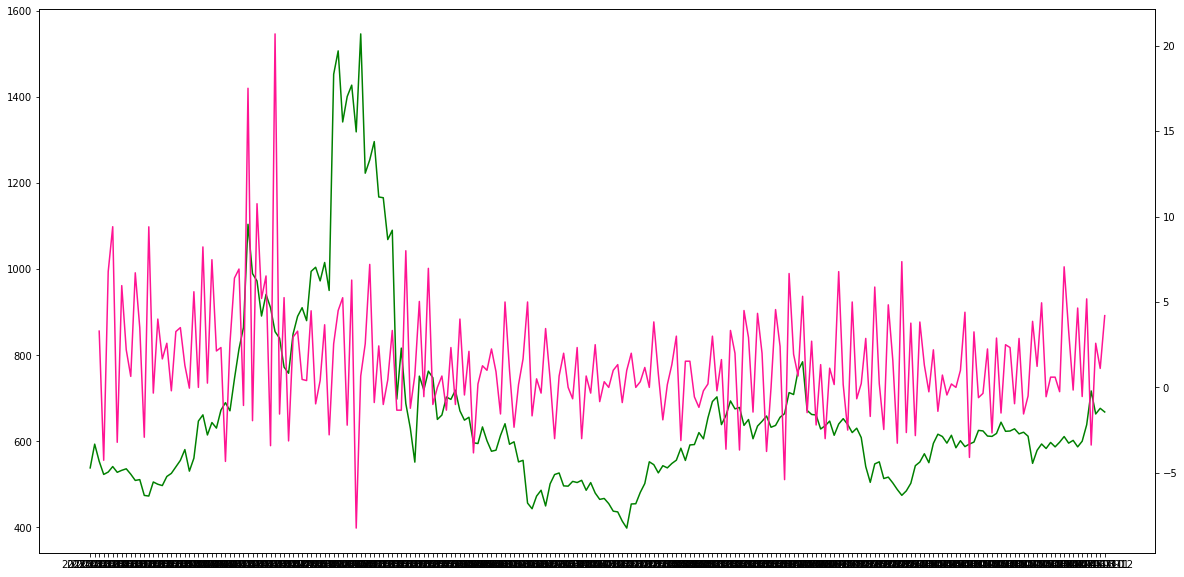

In [73]:
plt.rcParams['figure.figsize'] = (20, 10)
fig, ax1 = plt.subplots()
ax1.plot(x_values, y_values , color = 'green')

ax2 = ax1.twinx()
ax2.invert_xaxis()
ax2.plot(x_values, z_values , color = 'deeppink')

plt.show()

In [118]:
DF_bch_F['S_index'] = (DF_bch_F['S_index'])/2

In [119]:
DF_bch_F1 = DF_bch_F.set_index("date")

In [122]:
plyo.iplot(DF_bch_F1.iplot(asFigure=True))

In [121]:
for i in range(len(DF_bch_F1)):
  if DF_bch_F1['S_index'][i] <= 700 :
    DF_bch_F1['S_index'][i] = 0
    # print('yes')
  # else :
  #   # print('no')
